![Py4Eng](img/logo.png)

# Machine learning
## Yoav Ram

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(
    style='white',
    context='talk'
)

# Machine learning with *scikit-learn*

[![scikit-learn logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)](http://scikit-learn.org/)

*scikit-learn* is a Python package for machine learning:


- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

We will do [one of the many tutorials](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) from the *scikit-learn* website. 

You can install *scikit-learn* with `conda install scikit-learn`.

## Supervised learning: predicting an output variable from high-dimensional observations

Supervised learning consists in learning the link between two datasets: the observed data `X` and an external variable `y` that we are trying to predict, usually called “target” or “labels”. Most often, `y` is a 1D array of length `n_samples`.

All supervised estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

## Iris dataset

[Fisher's Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width.

![RA Fisher](https://upload.wikimedia.org/wikipedia/commons/4/46/R._A._Fischer.jpg)

![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)

Let's start by loading the dataset (you might need to install *scikit-learn*, use `conda install sklearn`).

In [2]:
import sklearn.datasets
import sklearn.neighbors as nb

In [3]:
iris = sklearn.datasets.load_iris()
print("Features:", iris.feature_names)
print("Types:", iris.target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Types: ['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## k-Nearest neighbors classifier (KNN)

The simplest possible classifier is the nearest neighbor: given a new observation `X_test`, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector.

> Training set and testing set
> 
> While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

Split the dataset to train and test data using a random permutation - this is easily done with the `cross_validation` package, which has many methods to split datasets. We'll use a very simple one, `train_test_split` which just splits that data by sampling a fraction of the rows to the training set and the rest to the test set (without replacement).

In [5]:
import sklearn.cross_validation as cv

In [20]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=20, random_state=0)

Import the nearest-neighbor classifier, then create and fit it:

In [21]:
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Predict the labels (Iris species) for the test data and compare with the real labels:

In [22]:
y_hat = knn.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', (y_hat == y_test).mean())

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
Accuracy: 0.95


# Reduce dimensions

To reduce the dimensionality of the problem (4 features - 4D) we can use *Seaborn*'s `PairGrid` plot to look for features that are well correlated:

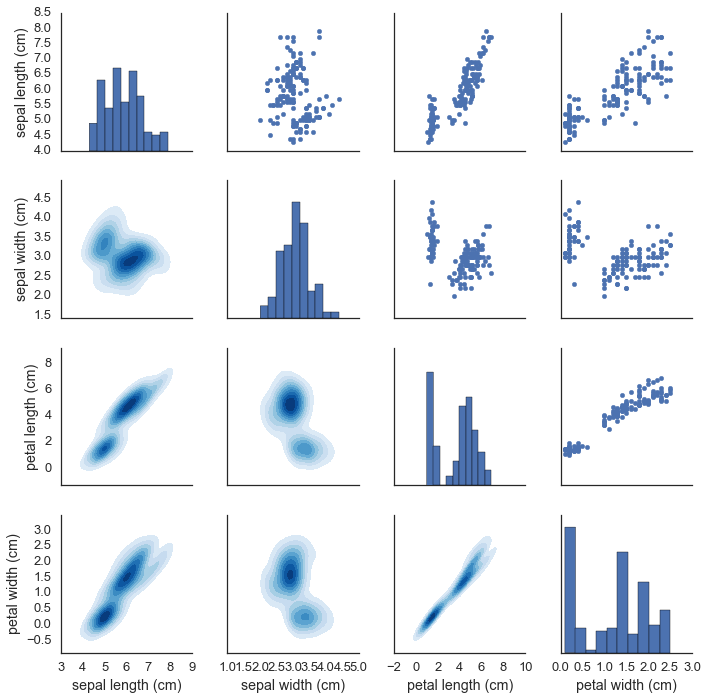

In [9]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap='Blues', legend=False, shade=True, shade_lowest=False)
g.map_diag(plt.hist);

Seems that the least correlated features are :

- sepal width - sepal length
- petal width - sepal width

Let's work just with the sepal then - the first two colums.

Split to training and testing:

In [23]:
X_train = X_train[:,2:]
X_test = X_test[:,2:]

Fit and predict:

In [24]:
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(y_hat)
print(y_test)
print('Accuracy:', (y_hat == y_test).mean())

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
Accuracy: 1.0


We gained much accuracy, but this might be specific to the train-test split we made.

Now that we are in 2D we can plot the classifier fit:

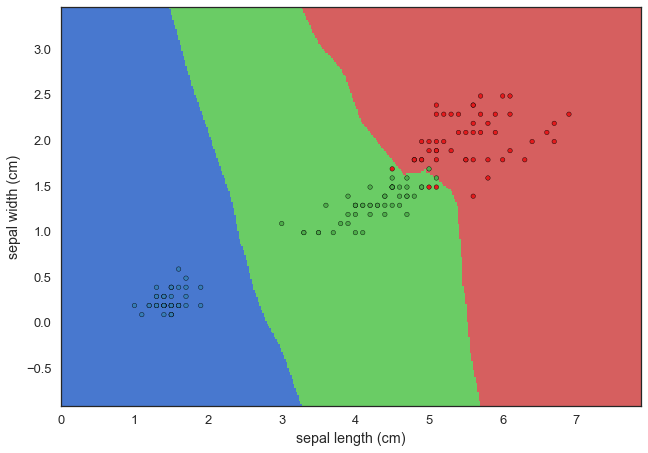

In [26]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
X = iris.data[:,2:]
y = iris.target

# Create color maps
cmap_light = ListedColormap(sorted(sns.color_palette('muted', 3)))
cmap_bold = ListedColormap(sorted(sns.color_palette('Set1', 3)))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
ax.set(
    xlim=(xx.min(), xx.max()),
    ylim=(yy.min(), yy.max()),
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1]
);

# Recognizing handwritten digits 

Learning to recognize handwritten digits with a K-nearest neighbors classifier, inspired by [IPython Interactive Computing and Visualization Cookbook](http://ipython-books.github.io/).

Start by looking at the data. We'll use IPython's widgets to create a slider so we can move between the > 1500 digits images that are in scikit-learn's datasets package.

Note: if `interact` doesn't work (no slider appears) you should install/update some packages (in your root environment): 

```sh
conda update ipykernel widgetsnbextension notebook jupyter jupyter_client jupyter_console jupyter_core`
```

In [27]:
from ipywidgets import interact
digits = sklearn.datasets.load_digits()

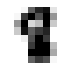

In [28]:
@interact(idx=(0, len(digits.images) - 1))
def show_digit(idx):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(digits.images[idx])
    ax.set(xticks=[], yticks=[])
    sns.despine(left=True, bottom=True)

The KNN classifier has a metaparameter - $k$, the number of neighbors to choose. 

To find an optimal value for $k$ we can use cross-validation: choose a value for $k$, randomly create many subsets of the data, train the model on each subset, test it on the rest of the dataset to get a score, then average over all the subsets to get an average score. 

This is easily done by calling [`cv.cross_val_score`](http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) on the estimator and the dataset.

In [29]:
X = digits.data
y = digits.target

In [30]:
ks = np.arange(1, 11, dtype=int) * 3
scores = np.array([
    cv.cross_val_score(nb.KNeighborsClassifier(k), X, y, cv=5) 
    for k in ks
])
print(scores)

[[ 0.95604396  0.95856354  0.96657382  0.98319328  0.96619718]
 [ 0.94505495  0.95856354  0.96657382  0.97478992  0.95211268]
 [ 0.93131868  0.95027624  0.97214485  0.97759104  0.94929577]
 [ 0.93406593  0.95303867  0.96935933  0.97478992  0.94929577]
 [ 0.93406593  0.95027624  0.96935933  0.9719888   0.94647887]
 [ 0.92857143  0.94475138  0.9637883   0.96078431  0.94647887]
 [ 0.92582418  0.94475138  0.9637883   0.96638655  0.94366197]
 [ 0.92307692  0.94198895  0.96657382  0.96918768  0.94647887]
 [ 0.93131868  0.93646409  0.94707521  0.96358543  0.94647887]
 [ 0.92582418  0.93646409  0.93871866  0.96078431  0.94084507]]


We transform the scores array into a pandas data frame so that we can plot the results in Seaborn. We concat the scores array (transformed to a data frame) and the `ks` array (transformed to a pandas `Series`, which is a data frame column), and then melt the data frame so that each row has one score.

In [31]:
scores = np.array(scores)
df = pd.concat((pd.DataFrame(scores), pd.Series(ks, name='k')), axis=1)
df = pd.melt(df, id_vars='k', var_name='fold', value_name='score')
df.head()

,k,fold,score
0,3,0,0.956044
1,6,0,0.945055
2,9,0,0.931319
3,12,0,0.934066
4,15,0,0.934066


Finally we plot using seaborn's `factorplot`. We only have 5 scores for each `k` value, but if we had many we could have used `kind=box` or `kind=violin`.

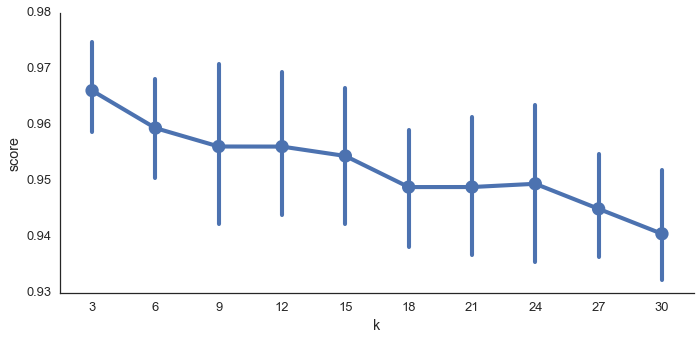

In [32]:
sns.factorplot('k', 'score', data=df, kind="point", size=5, aspect=2);

# Linear model
## California housing dataset

In [157]:
dataset = sklearn.datasets.fetch_california_housing()
print(dataset['DESCR'])

df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.head()

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [220]:
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=0)

## Linear regression

`LinearRegression`, in it’s simplest form, fits a linear model to the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

Linear models: $y = X\beta + \epsilon$

- $X$: data
- $y$: target variable
- $\beta$: Coefficients
- $\epsilon$: Observation noise

Let's import the `linear_model` module:

In [159]:
from sklearn import linear_model

We fit the linear regression, similarly to the KNN fit from above, and fit the coefficients ($\beta_i$).

In [160]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_)

[  4.39091042e-01   9.59864665e-03  -1.03311173e-01   6.16730152e-01
  -7.63275197e-06  -4.48838256e-03  -4.17353284e-01  -4.30614462e-01]


The mean square error is one measure for the good of the fit:

In [161]:
y_hat = regr.predict(X_test)
print("Mean square error:", np.mean((y_hat - y_test)**2))

Mean square error: 0.540412806171


Explained variance score: 1 is perfect prediction and 0 means that there is no linear relationship between `X` and `Y`:

In [162]:
print("Explained variance score:", regr.score(X_test, y_test))

Explained variance score: 0.591169543641


## Exercise: Lasso regression

To improve the conditioning of the problem (i.e. mitigating the the _curse of dimensionality_), it would be interesting to select only the informative features and set non-informative ones to 0.

A penalization approach, called *Lasso* (least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called *parse methods* and sparsity can be seen as an application of *Occam’s razor*: prefer simpler models.

* Use `linear_model.Lasso` instead of `linear_model.LinearRegression` to fit the data. 

Note that prior to applying the fit, you need to set the `alpha` parameter of the regression object using `lasso.set_params(alpha=...)`. This parameter determines the strengh of the penalization. 

* Fit the data for some values of $\alpha \in (10^{-4}, 10^{-6})$ and print the coefficients. 
* Then, use `LassoCV`, which automatically finds an optimal $\alpha$ using cross-validation and print the coefficients.

**Bonus**: Plot the score of different $\alpha$ and the value found by `LassoCV`.

See [solution code](https://github.com/yoavram/Py4Eng/blob/master/solutions/sklearn_cali_housing_lasso.py).

0.0001 [  4.38725041e-01   9.60573216e-03  -1.02607317e-01   6.13113796e-01
  -7.60040055e-06  -4.48887838e-03  -4.17236219e-01  -4.30443252e-01]
0.000215443469003 [  4.38302495e-01   9.61391144e-03  -1.01794733e-01   6.08938831e-01
  -7.56305472e-06  -4.48945068e-03  -4.17101115e-01  -4.30245638e-01]
0.000464158883361 [  4.37392131e-01   9.63153273e-03  -1.00044046e-01   5.99944032e-01
  -7.48259718e-06  -4.49068359e-03  -4.16810078e-01  -4.29819929e-01]
0.001 [  4.35430588e-01   9.66949146e-03  -9.62719961e-02   5.80564052e-01
  -7.30927570e-06  -4.49333892e-03  -4.16183481e-01  -4.28903173e-01]
0.00215443469003 [  4.31204047e-01   9.75125876e-03  -8.81446225e-02   5.38808130e-01
  -6.93591112e-06  -4.49905750e-03  -4.14834520e-01  -4.26929052e-01]
0.00464158883361 [  4.22097249e-01   9.92739780e-03  -7.06333349e-02   4.48842020e-01
  -6.13160704e-06  -4.51137374e-03  -4.11930165e-01  -4.22677769e-01]
0.01 [  4.02474124e-01   1.03068044e-02  -3.29020231e-02   2.54997948e-01
  -4.3990

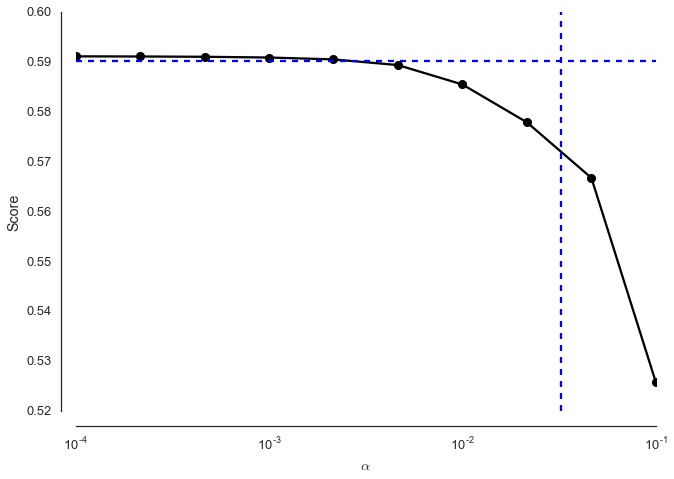

# References

- [scikit-learn supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.0, [IPython](http://ipython.org/) 5.2.2, [Jupyter](http://jupyter.org) 4.3.0.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)